### Importing Libraries

In [1]:
import ccxt
import time
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np

### CCXT Configuration

In [2]:
binance = ccxt.binance()
coin = 'ETH/USDT'       # coin to retreive data for
ticker = binance.fetch_ticker(coin)
coin_ticker = binance.fetch_ohlcv(coin, '1m', limit=100)
style = 'yahoo'


### Converting into Pandas DataFrame

In [3]:
df = pd.DataFrame(coin_ticker, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])  # Changing the column names for ease of use

In [4]:
df.index = pd.to_datetime(df['Date'], unit = 'ms' )  # convert to datetime
# df['Date'] = pd.to_datetime(df['Date'], unit = 'ms' )  

### Observing the Data 

In [5]:
df.head(3)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2023-04-02 05:28:00,1680413280000,1816.16,1816.16,1815.93,1815.93,62.9293
2023-04-02 05:29:00,1680413340000,1815.93,1815.94,1815.75,1815.76,91.2065
2023-04-02 05:30:00,1680413400000,1815.76,1816.29,1815.75,1815.99,146.0002


In [6]:
df.tail(3)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2023-04-02 07:05:00,1680419100000,1821.95,1821.95,1821.87,1821.88,103.5987
2023-04-02 07:06:00,1680419160000,1821.87,1823.28,1821.87,1823.28,307.7122
2023-04-02 07:07:00,1680419220000,1823.27,1823.46,1822.77,1823.46,236.2698


In [7]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.680416e+12,1820.777300,1821.088800,1820.605100,1820.851000,170.956725
std,1.740690e+06,1.838471,1.789517,1.794637,1.798145,188.391133
min,1.680413e+12,1815.760000,1815.940000,1815.750000,1815.760000,19.609200
25%,1.680415e+12,1819.927500,1820.130000,1819.827500,1819.930000,66.842075
50%,1.680416e+12,1820.540000,1820.840000,1820.420000,1820.570000,113.207000
75%,1.680418e+12,1821.862500,1822.252500,1821.600000,1821.897500,211.121500
max,1.680419e+12,1824.800000,1824.810000,1824.070000,1824.800000,1263.751000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2023-04-02 05:28:00 to 2023-04-02 07:07:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    100 non-null    int64  
 1   Open    100 non-null    float64
 2   High    100 non-null    float64
 3   Low     100 non-null    float64
 4   Close   100 non-null    float64
 5   Volume  100 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


### Basic Plotting using MPLFinance

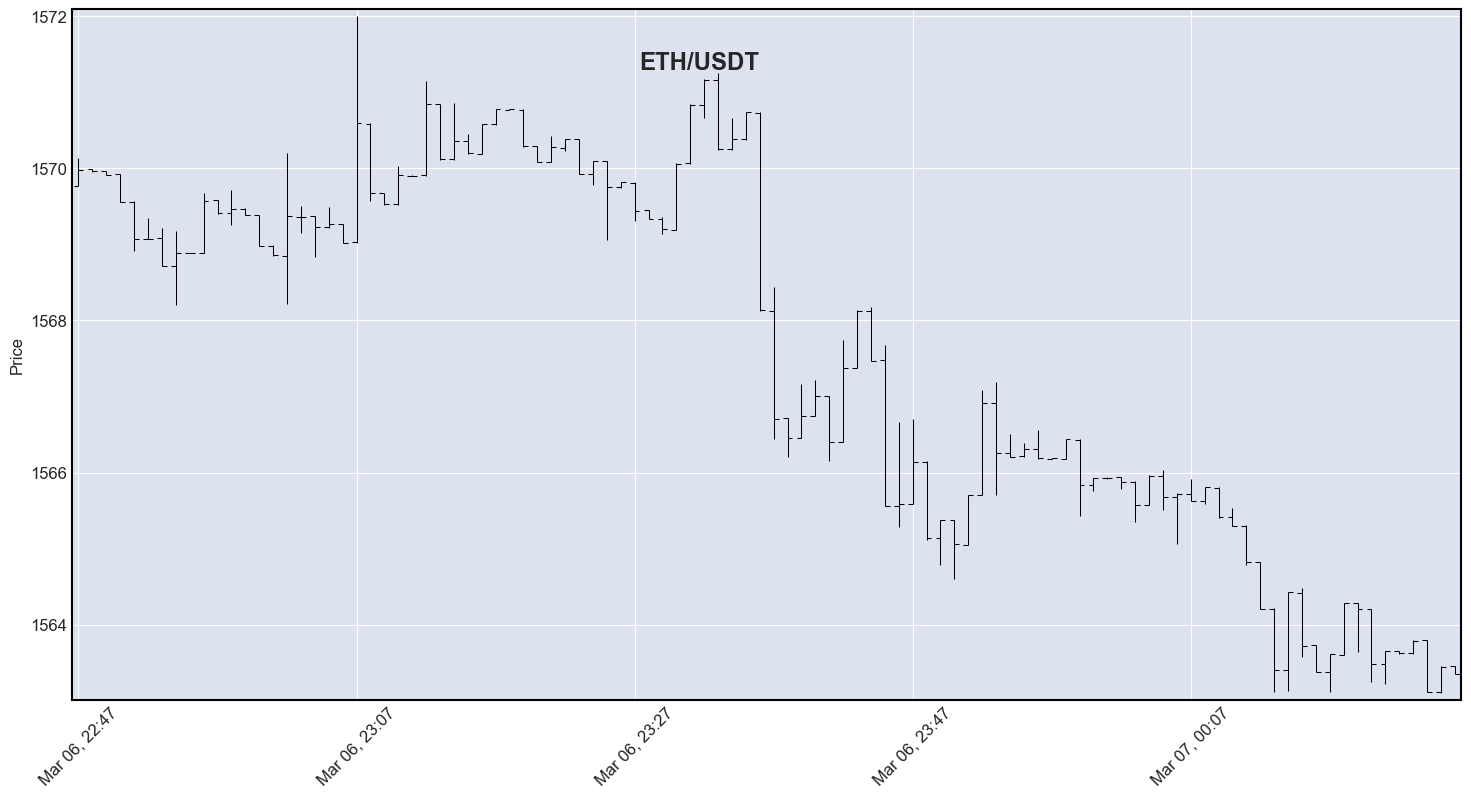

In [9]:
fig, axes = mpf.plot(df,title = coin,tight_layout = True,figsize = (16,8), returnfig = True)

### Line Chart

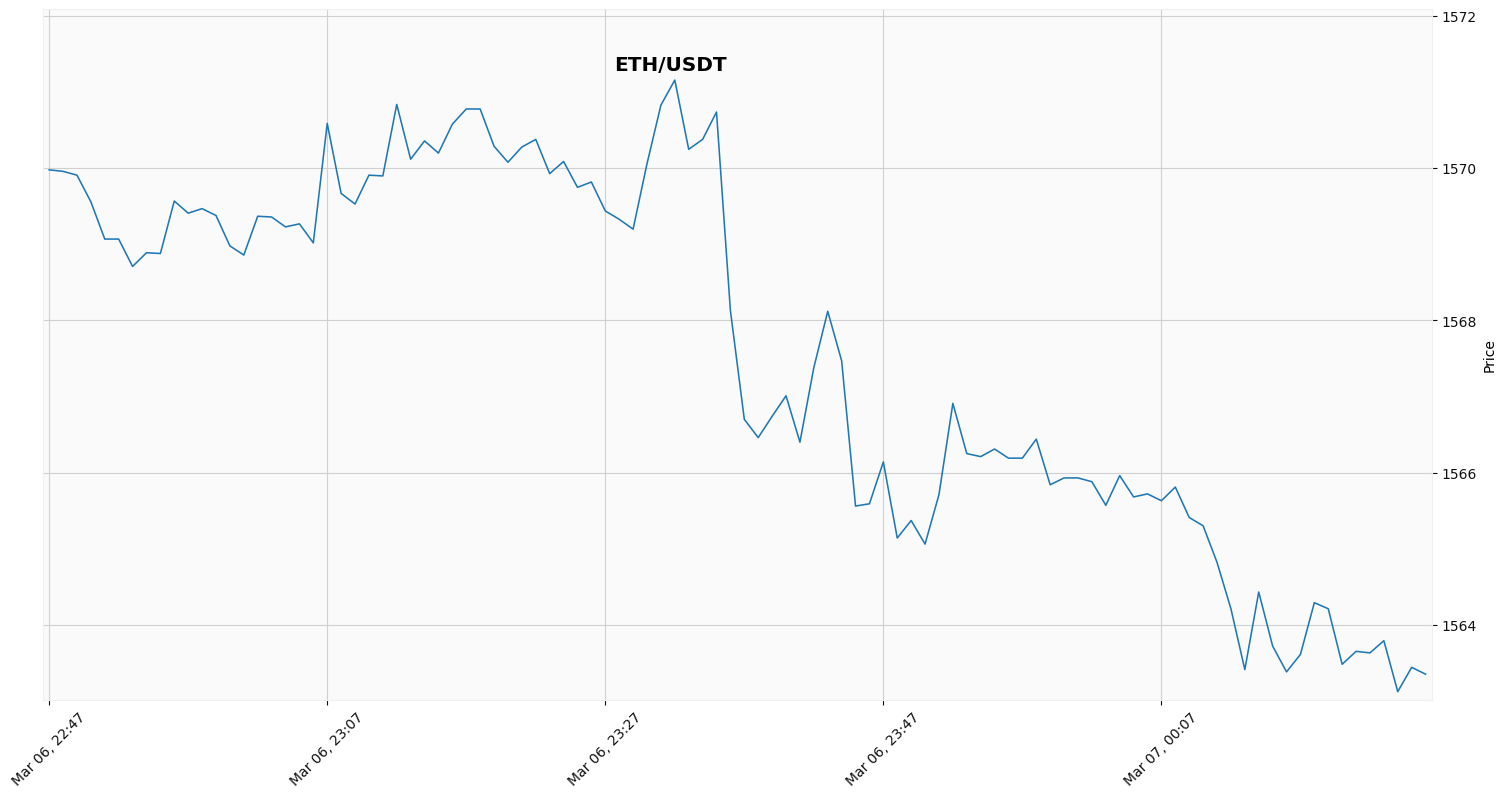

In [10]:
fig,axes = mpf.plot(df, type = 'line', volume = False, title = coin,style = style,tight_layout = True,figsize = (16,8), returnfig = True)

### Candlestick Chart

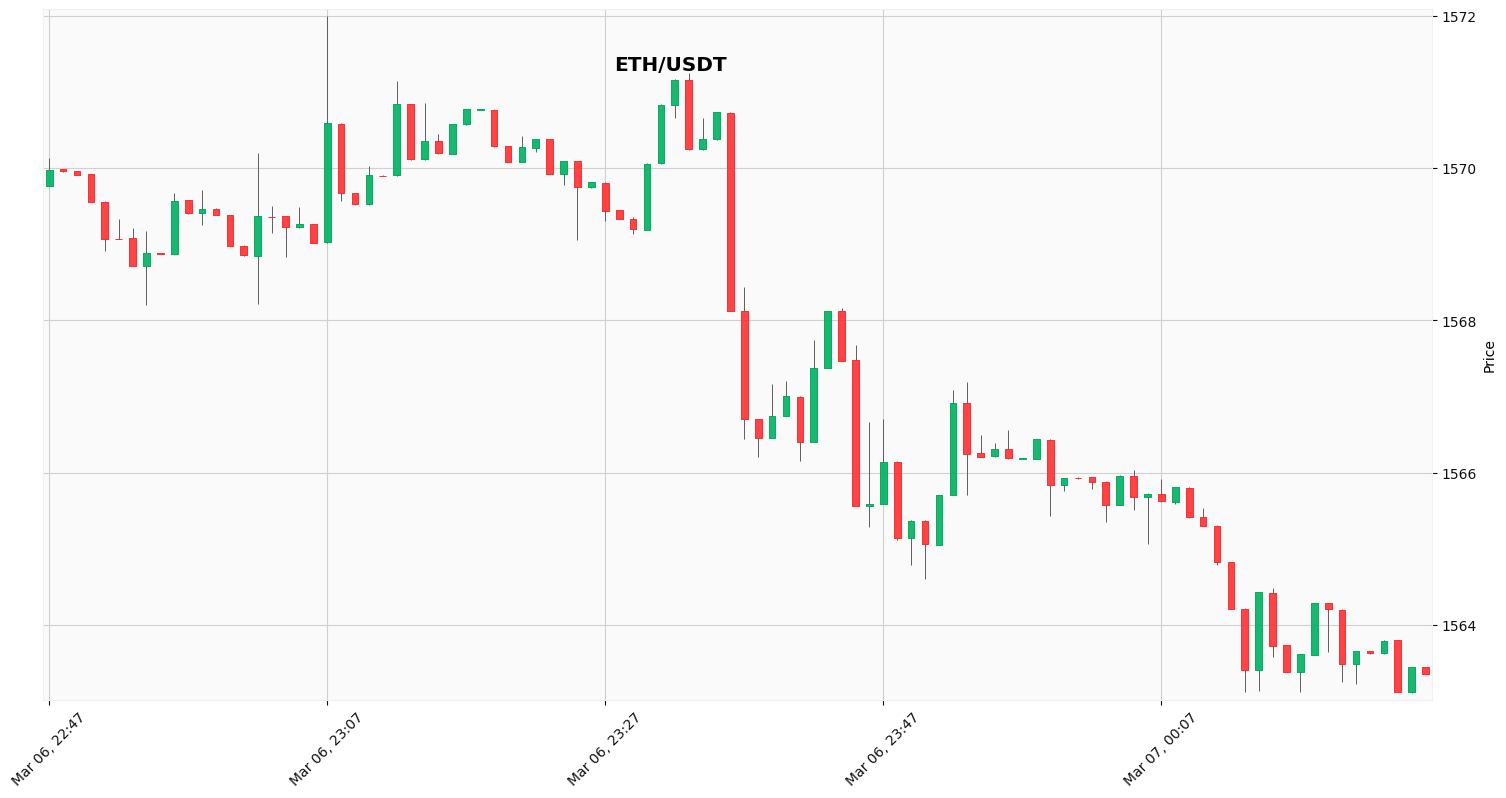

In [11]:
fig, axes = mpf.plot(df, type = 'candle', volume = False,title = coin,style = style,tight_layout = True,figsize = (16,8), returnfig = True)

### Candlestick Chart with Volume

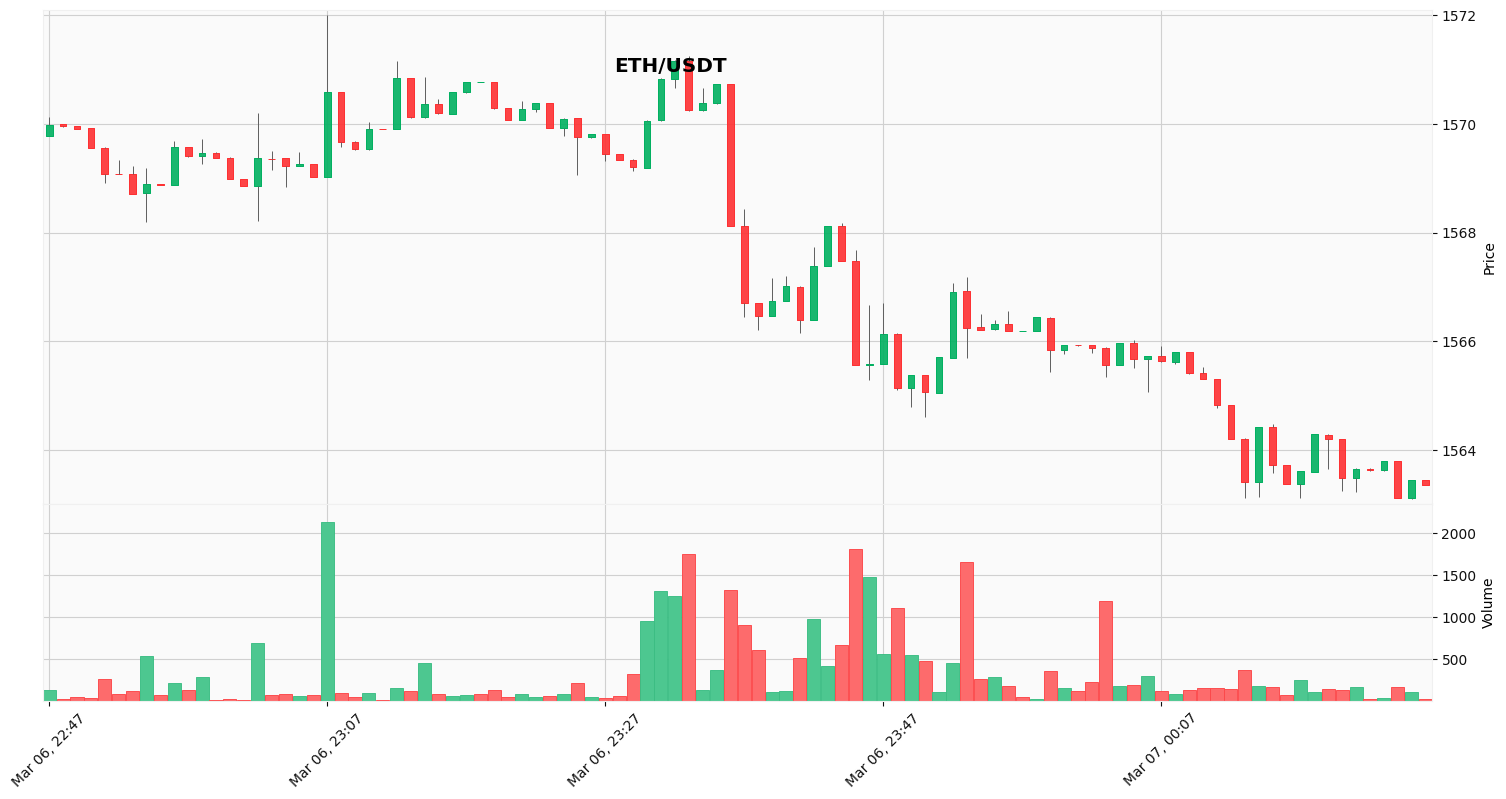

In [12]:
fig, axes = mpf.plot(df, type = 'candle', volume = True,title = coin,style = style,tight_layout = True,figsize = (16,8), returnfig = True)

### Candlestick chart with MA

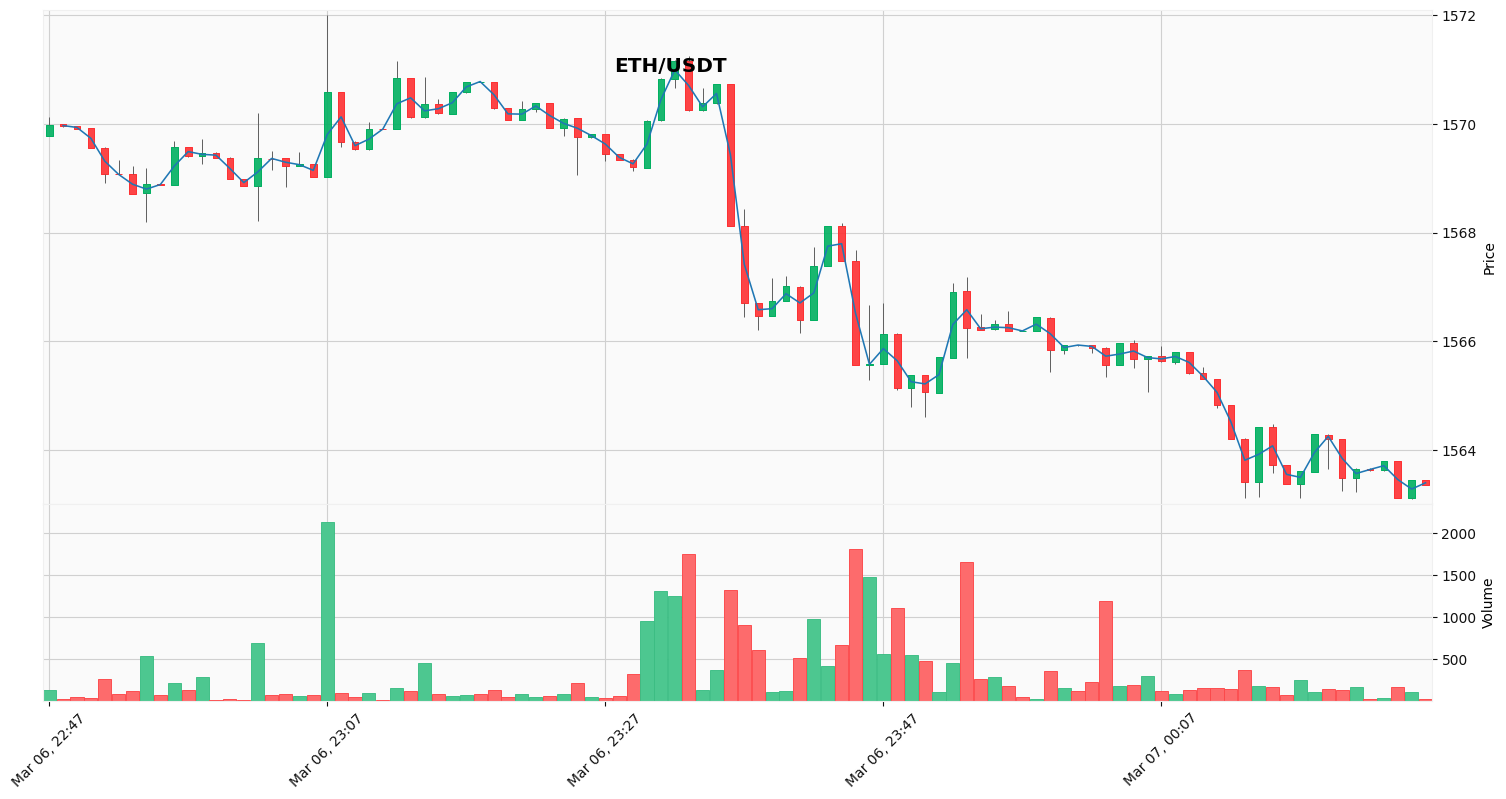

In [13]:
fig, axes = mpf.plot(df, type = 'candle',mav = 2, volume = True,title = coin,style = style,tight_layout = True,figsize = (16,8), returnfig = True)

### Candlestick chart with Multiple MAs

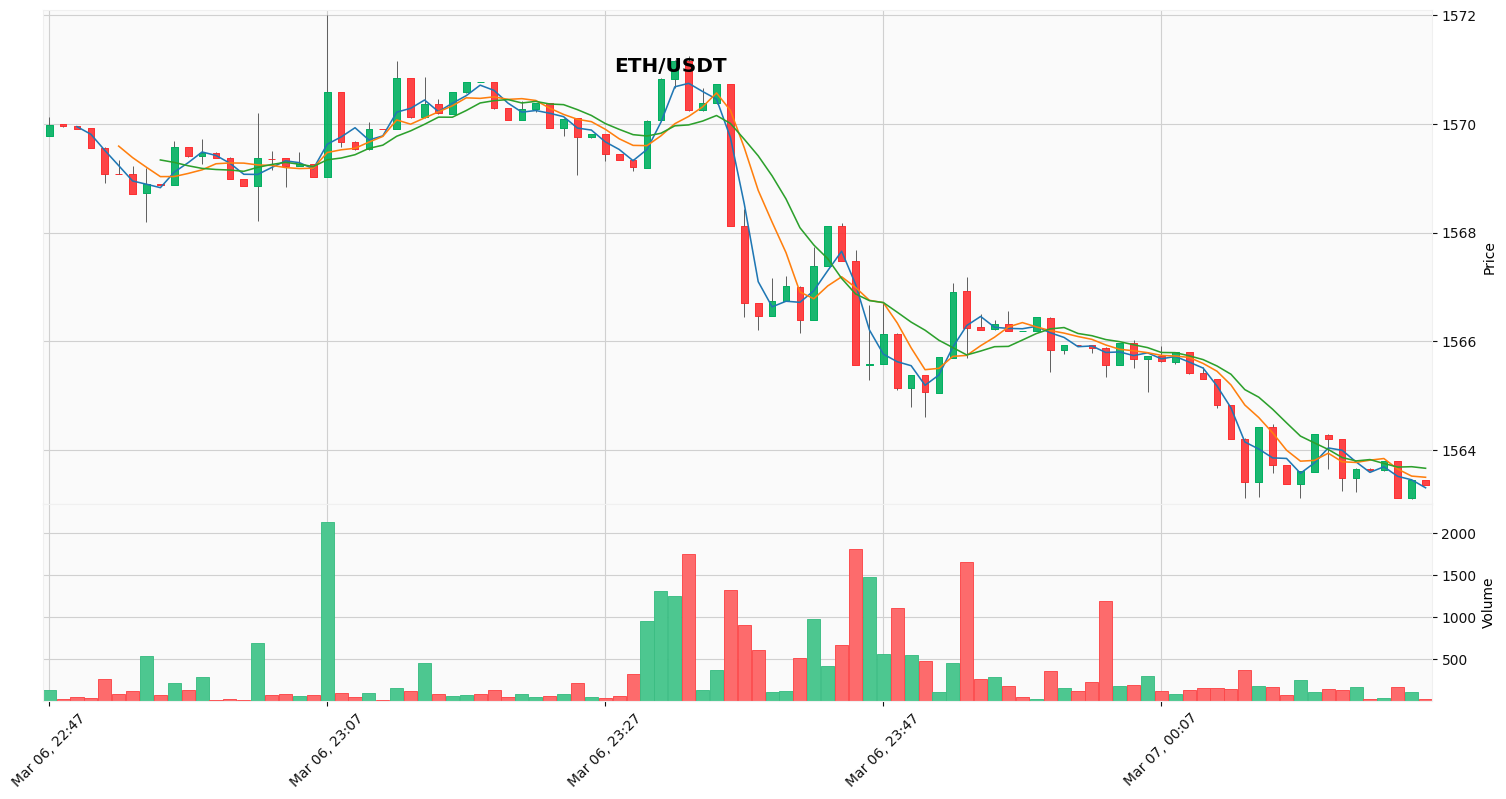

In [14]:
fig, axes = mpf.plot(df, type = 'candle',mav = (3,6,9), volume = True, show_nontrading = False
       ,title = coin,style = style,tight_layout = True,figsize = (16,8), returnfig = True)   # 3 moving average of price

In [15]:
# mpf.plot(df, type = 'candle',mav = (7,14,21), volume = True, style = 'binance', title = coin, show_nontrading = False,
#         tight_layout = True, figratio = (10,5), figscale = 1, savefig ='ccxt.png') # Saving the plot

In [16]:
# """ Plotting High and Low of Prices"""
# ap0 = [mpf.make_addplot(df["High"]), 
#        mpf.make_addplot(df["Low"])]
# mpf.plot(df,type='candle',volume = True,addplot=ap0,style = 'binance',tight_layout = True, figsize = (16,8),figscale=1.6)  

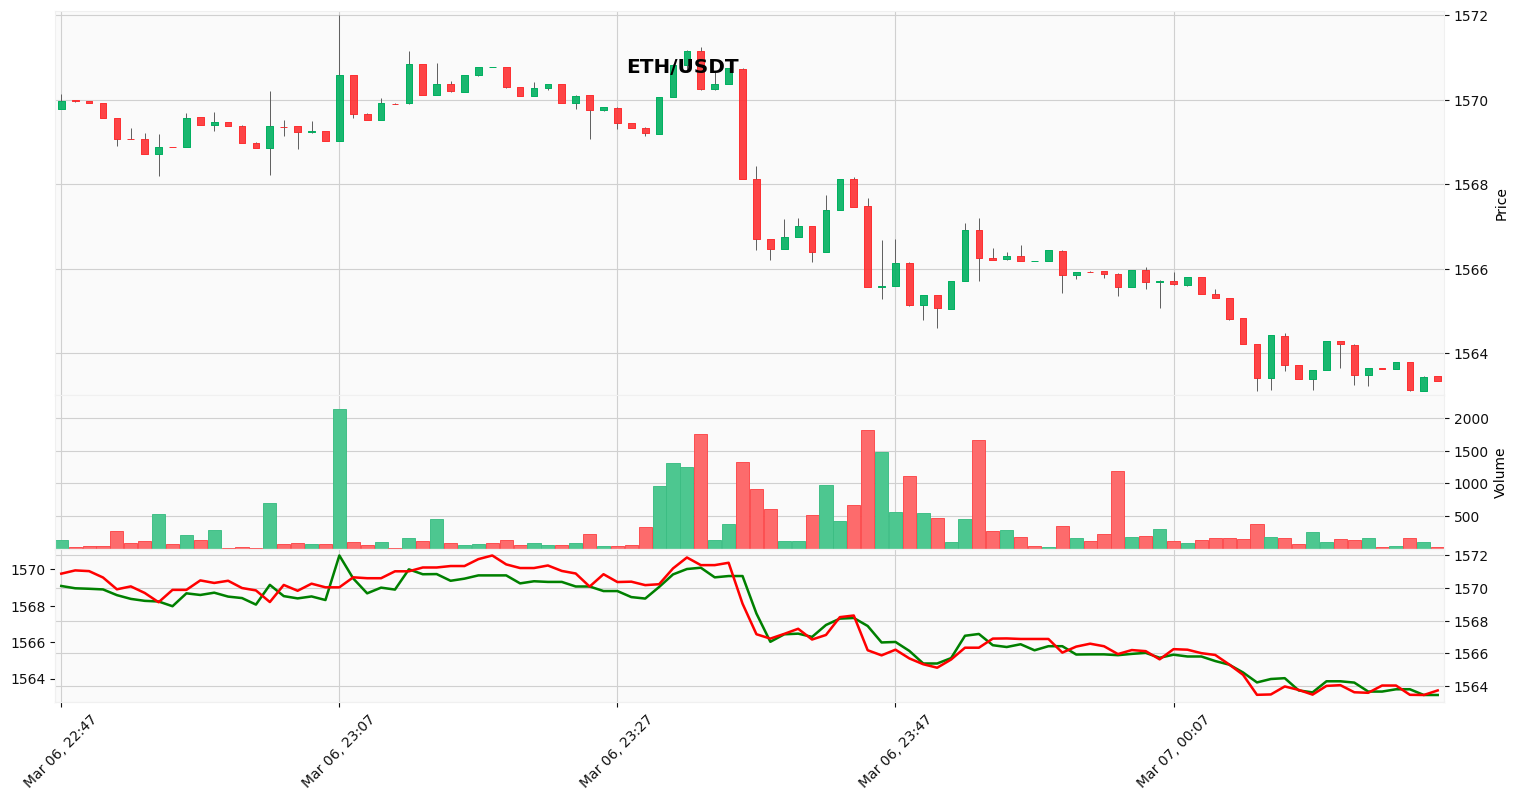

In [17]:
""" Plotting High and Low of Prices in Separate Panel"""
ap2 = [
    mpf.make_addplot(df["High"], color = 'g', panel=2), # Panel 2 is specified
    mpf.make_addplot(df["Low"], color = 'r', panel=2)
]
fig, axes = mpf.plot(df,type='candle',volume = True,addplot=ap2,title = coin,style = style,tight_layout = True,figsize = (16,8), returnfig = True)

### Plotting Average Volume

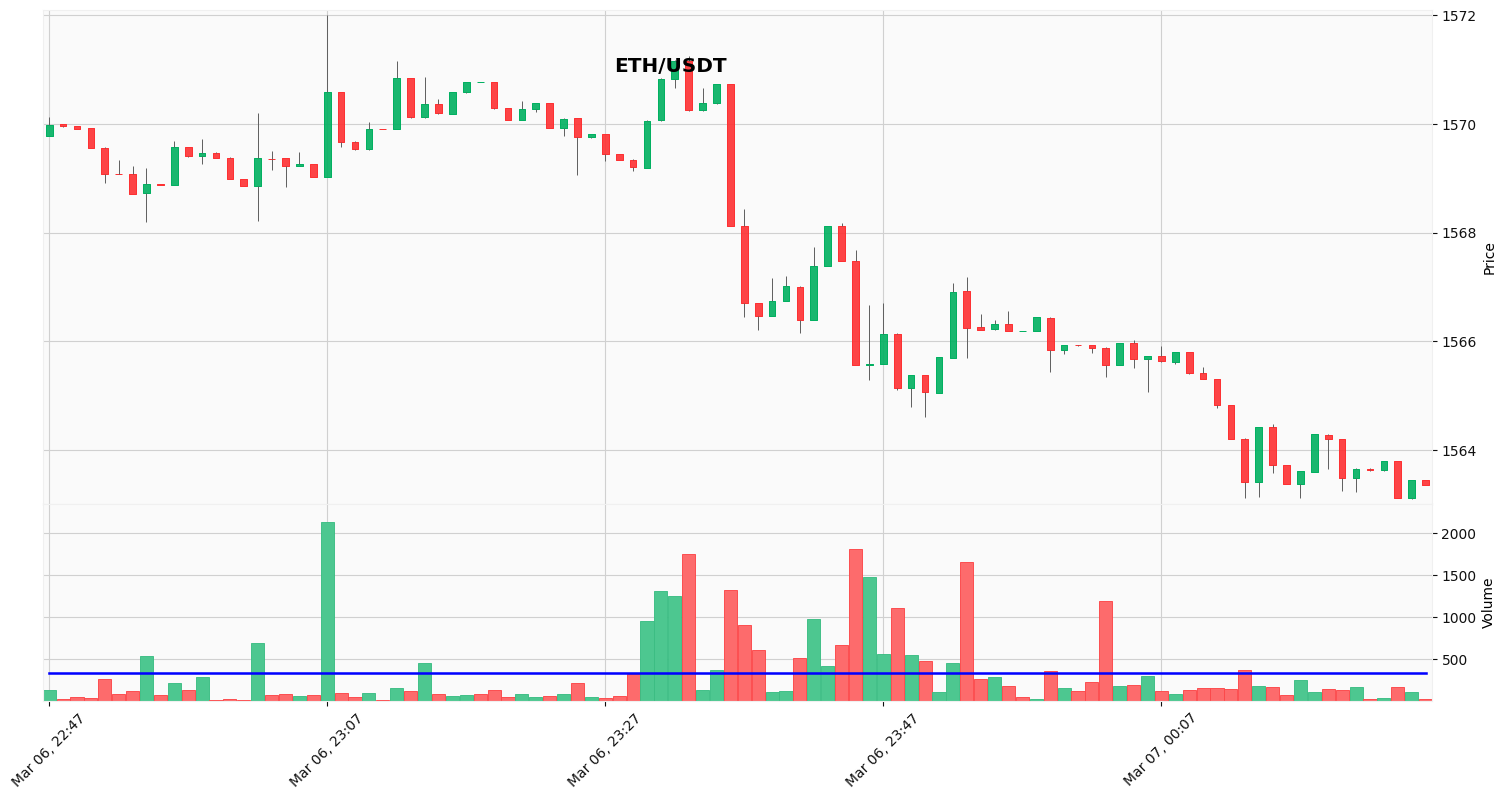

In [18]:
ap0 = [mpf.make_addplot([df["Volume"].mean()]* len(df),color = 'b', panel = 1)]
fig, axes = mpf.plot(df,type='candle',volume = True,addplot=ap0,title = coin,style = style,tight_layout = True,figsize = (16,8), returnfig = True)

### SMA

In [19]:
d3 = 3
d5 = 5
d7 = 7
def ma_days(days):
    try:
        df[f'Mean({days})']
    except KeyError:
        df[f'Mean({days})'] = df["Close"].rolling(days).mean()

ma_days(d3)
ma_days(d5)
ma_days(d7)

In [20]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Mean(3),Mean(5),Mean(7)
Date,,,,,,,,,
2023-03-06 22:47:00,1678142820000,1569.77,1570.13,1569.77,1569.98,139.1394,NaN,NaN,NaN
2023-03-06 22:48:00,1678142880000,1569.99,1569.99,1569.95,1569.96,26.8387,NaN,NaN,NaN


### Plotting SMAs

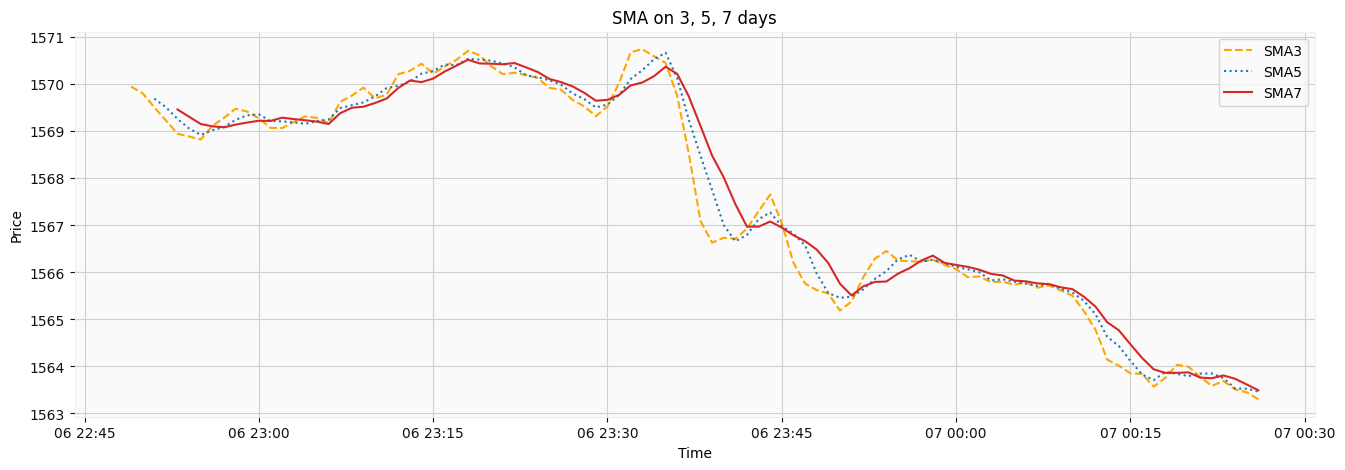

In [21]:
plt.figure(figsize = (16,5))
plt.plot(df[f"Mean({d3})"], color = 'orange', label = f"SMA{d3}",linestyle='--')
plt.plot(df[f"Mean({d5})"], color = 'tab:blue', label = f"SMA{d5}",linestyle=':')
plt.plot(df[f"Mean({d7})"], color = 'tab:red', label = f"SMA{d7}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f'SMA on {d3}, {d5}, {d7} days')
plt.legend()
plt.show()

### Plotting SMAs with Volume

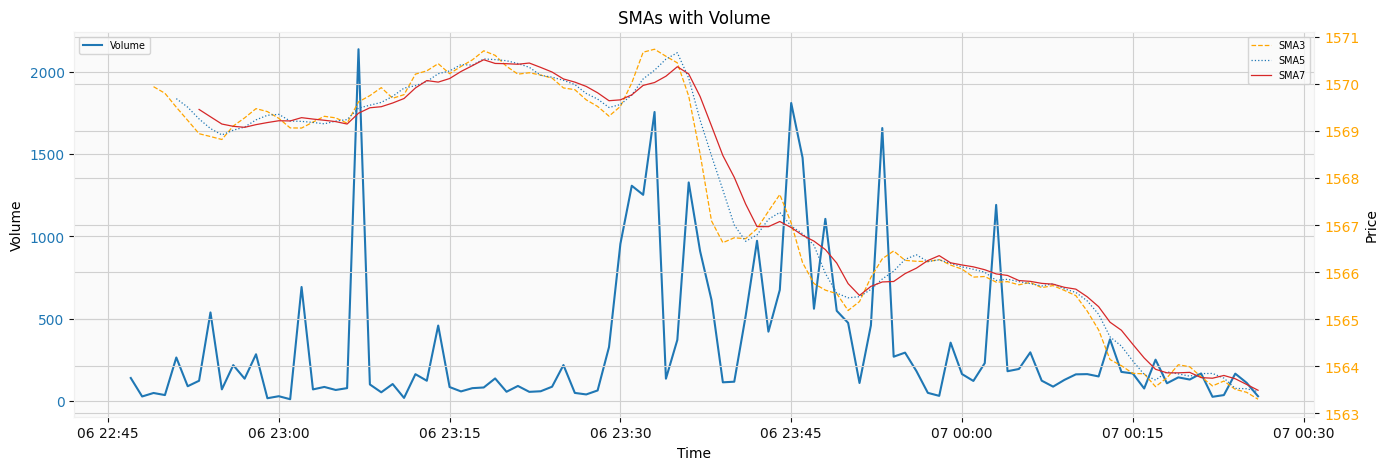

In [22]:
fig, ax1 = plt.subplots(figsize = (16,5))
frame1 = plt.gca()
ax1.set_xlabel('Time')
ax1.set_title("SMAs with Volume")
ax1.set_ylabel('Volume')
ax1.plot(df["Volume"], color = 'tab:blue', label = "Volume")
ax1.tick_params(axis = 'y', labelcolor = 'tab:blue')
ax1.legend(loc = 'upper left', fontsize = 'x-small')

ax2 = ax1.twinx()
ax2.set_ylabel("Price")
ax2.tick_params(axis = 'y', labelcolor = 'orange')
ax2.plot(df[f"Mean({d3})"], color = 'orange', label = f"SMA{d3}",linewidth=0.9,linestyle='--')
ax2.plot(df[f"Mean({d5})"], color = 'tab:blue', label = f"SMA{d5}",linewidth=0.9,linestyle=':')
ax2.plot(df[f"Mean({d7})"], color = 'tab:red', label = f"SMA{d7}",linewidth=0.9)
ax2.legend(loc = 'upper right', fontsize = 'x-small')
plt.show()

### Exponential Moving Average

In [23]:
def ema(days):
    try:
        df[f'EMA({days})']
    except KeyError:
        df[f'EMA({days})'] = df["Close"].ewm(span = days, adjust = True).mean()
ema(d3)
ema(d5)
ema(d7)


In [24]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Mean(3),Mean(5),Mean(7),EMA(3),EMA(5),EMA(7)
Date,,,,,,,,,,,,
2023-03-06 22:47:00,1678142820000,1569.77,1570.13,1569.77,1569.98,139.1394,NaN,NaN,NaN,1569.980000,1569.980,1569.980000
2023-03-06 22:48:00,1678142880000,1569.99,1569.99,1569.95,1569.96,26.8387,NaN,NaN,NaN,1569.966667,1569.968,1569.968571


### Plotting EMAs

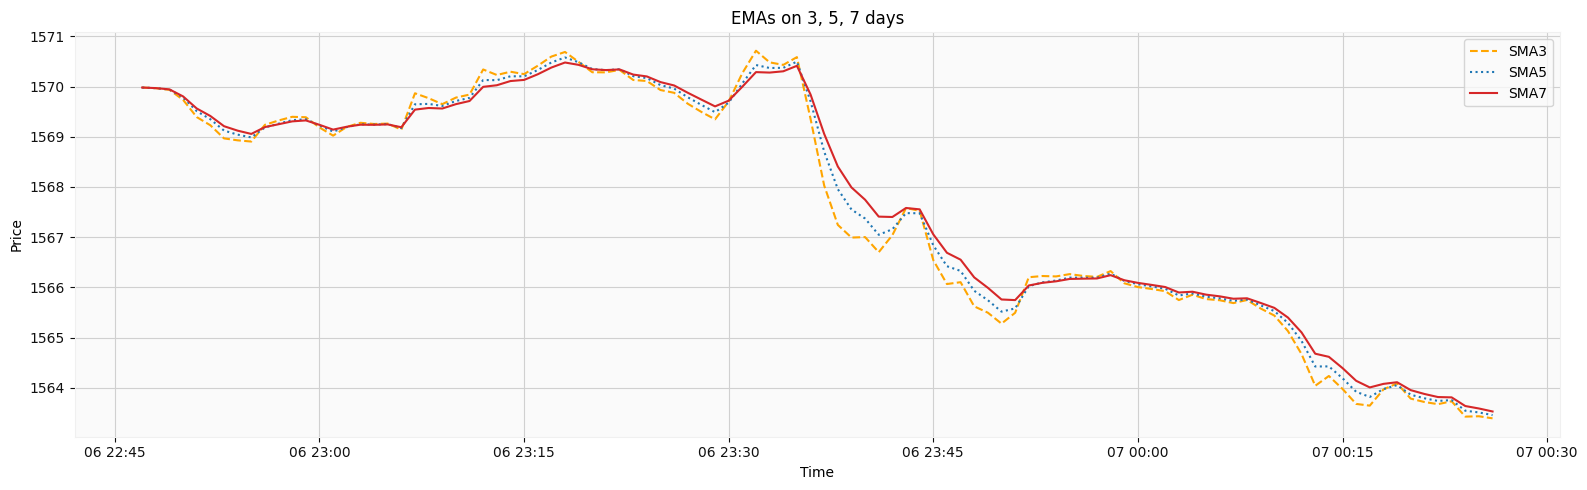

In [25]:
plt.figure(figsize = (16,5))
plt.plot(df[f"EMA({d3})"], color = 'orange', label = f"SMA{d3}",linestyle='--')
plt.plot(df[f"EMA({d5})"], color = 'tab:blue', label = f"SMA{d5}",linestyle=':')
plt.plot(df[f"EMA({d7})"], color = 'tab:red', label = f"SMA{d7}")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f'EMAs on {d3}, {d5}, {d7} days')
plt.legend()
plt.tight_layout()
plt.show()

### Plotting EMAs with Volume

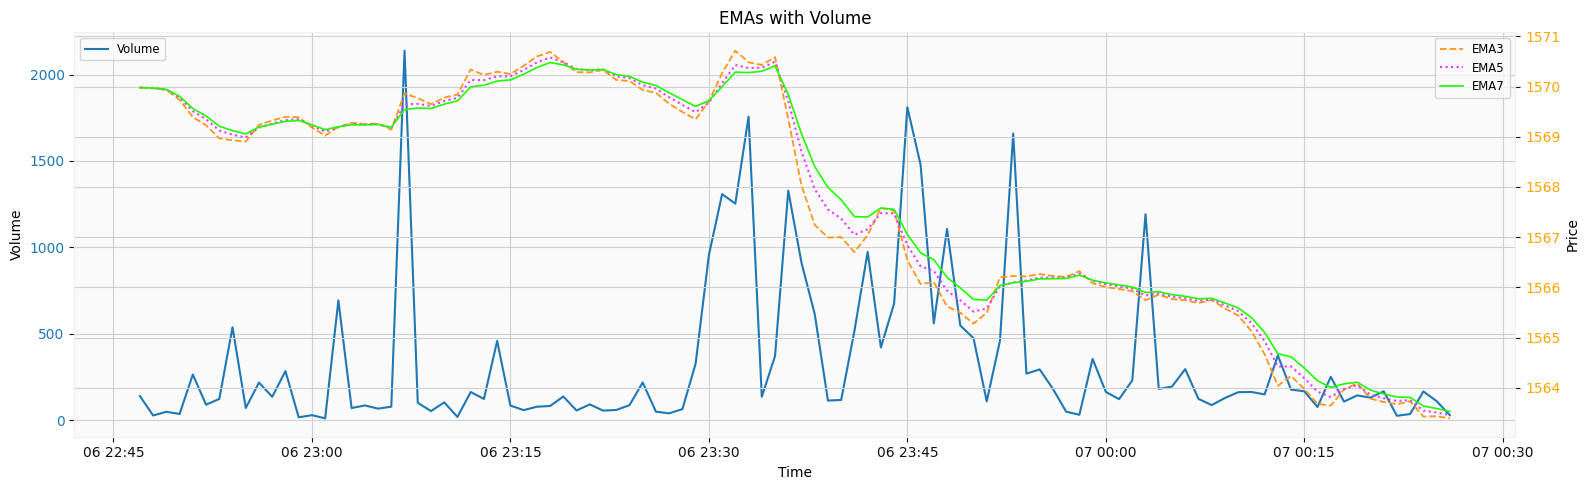

In [26]:
fig, ax1 = plt.subplots(figsize = (16,5))
frame1 = plt.gca()
ax1.set_xlabel('Time')

ax1.set_ylabel('Volume')
ax1.plot(df["Volume"], color = 'tab:blue', label = "Volume")
ax1.tick_params(axis = 'y', labelcolor = 'tab:blue')
ax1.legend(loc = 'upper left', fontsize = 'small')

ax2 = ax1.twinx()
ax2.set_ylabel("Price")
ax2.tick_params(axis = 'y', labelcolor = 'orange')
ax2.plot(df[f"EMA({d3})"], color = '#ff951c', label = f"EMA{d3}",linewidth=1.3,linestyle='--')
ax2.plot(df[f"EMA({d5})"], color = '#ee35ff', label = f"EMA{d5}",linewidth=1.5,linestyle=':')
ax2.plot(df[f"EMA({d7})"], color = '#1dff00', label = f"EMA{d7}",linewidth=1.2)
ax2.legend(loc = 'upper right', fontsize = 'small')
plt.title('EMAs with Volume')
plt.tight_layout()
plt.show()

### Plotting EMA and SMA

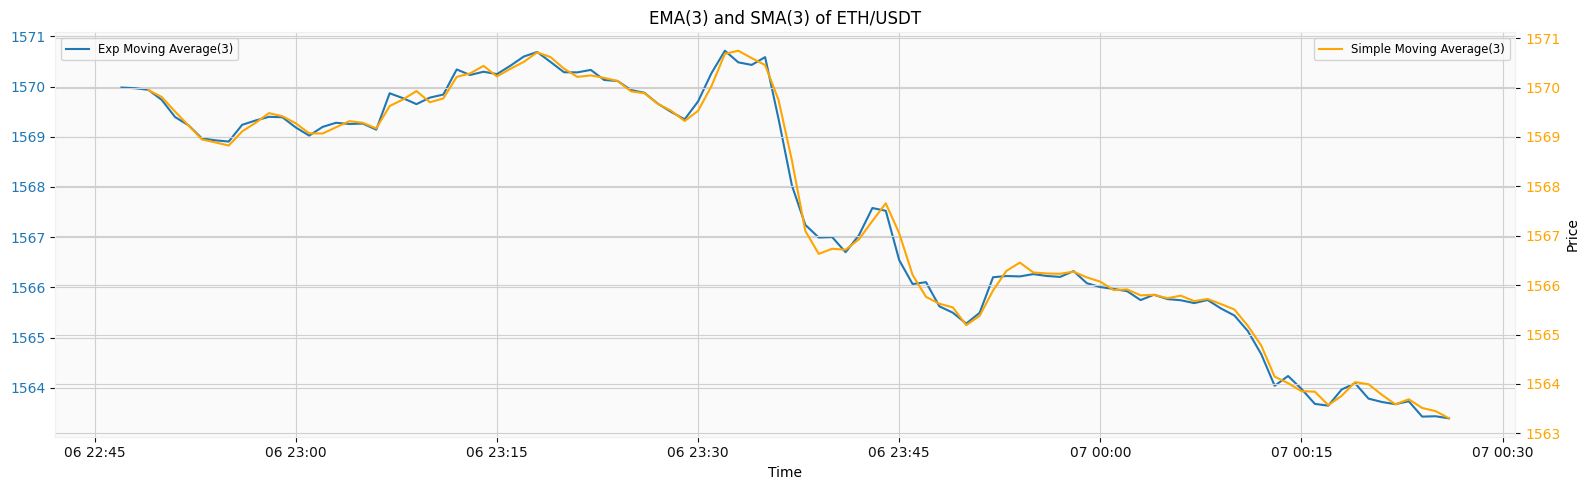

In [27]:
fig, ax1 = plt.subplots(figsize = (16,5))
ax1.set_title(f'EMA({d3}) and SMA({d3}) of {coin}')
ax1.set_xlabel('Time')
# ax1.set_ylabel('EMA')
ax1.plot(df[f"EMA({d3})"], color = 'tab:blue', label = f"Exp Moving Average({d3})",)
ax1.tick_params(axis = 'y', labelcolor = 'tab:blue')
ax1.legend(loc = 'upper left', fontsize = 'small')

ax2 = ax1.twinx()
ax2.set_ylabel("Price")
ax2.plot(df[f"Mean({d3})"], color = 'orange',label = f"Simple Moving Average({d3})")
ax2.tick_params(axis = 'y', labelcolor = 'orange')
ax2.legend(loc = 'upper right', fontsize = 'small')
fig.tight_layout()
plt.show()

### EMAs with Candlestick and Average Volume Chart

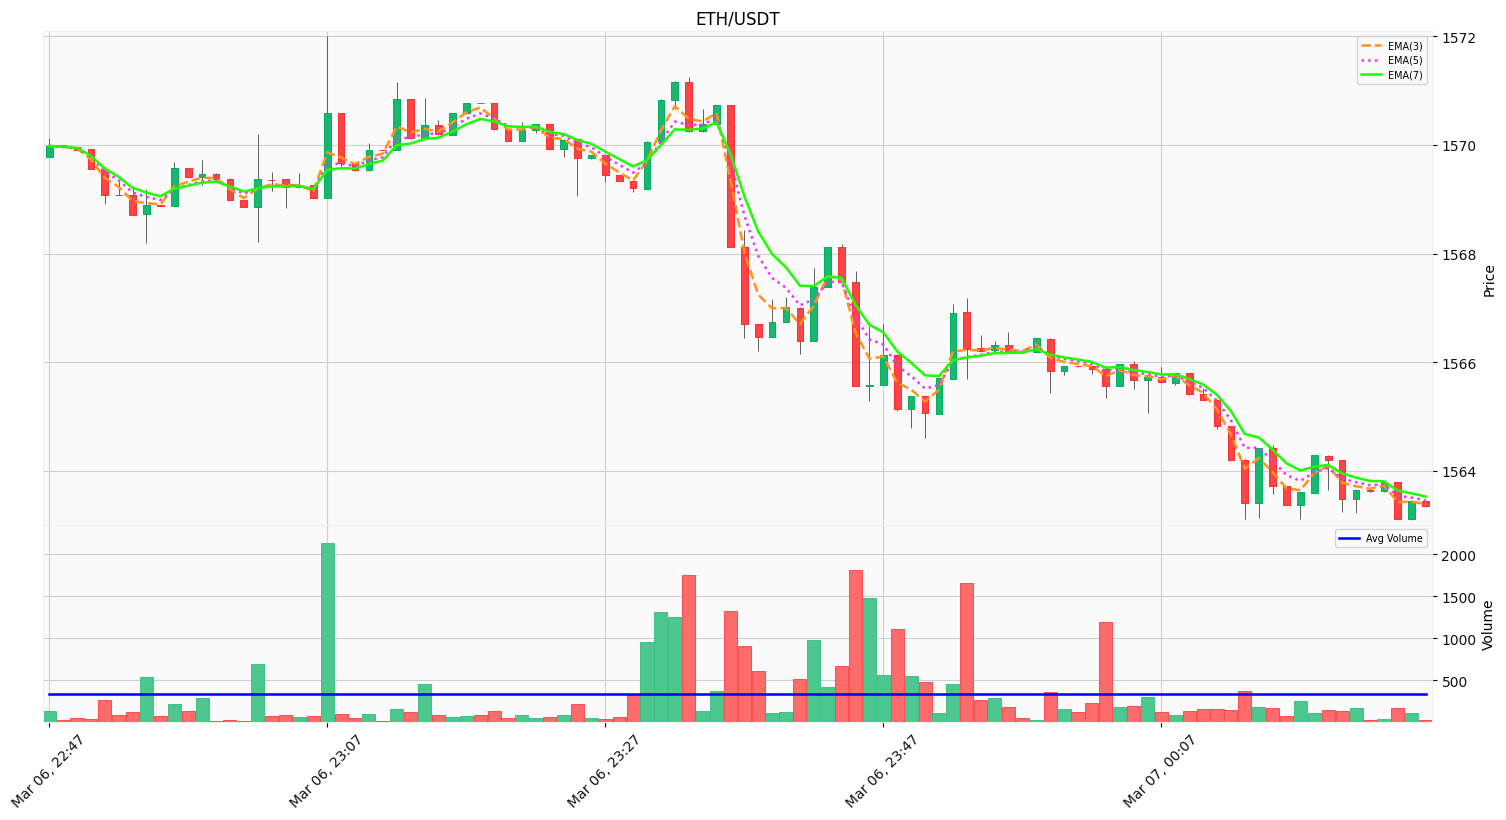

In [28]:
ap0 = [
    mpf.make_addplot(df[f"EMA({d3})"], color = '#ff951c', panel=0,linestyle='--'),
    mpf.make_addplot(df[f"EMA({d5})"], color = '#ee35ff', panel=0,linestyle=':'),
    mpf.make_addplot(df[f"EMA({d7})"], color = '#1dff00', panel=0),
    mpf.make_addplot([df["Volume"].mean()]* len(df),color = 'b', panel = 1)
    ]


fig, axes = mpf.plot(df,returnfig = True,type='candle',volume = True, addplot=ap0,style = style,tight_layout = True,figsize = (16,8))
axes[0].set_title(f"{coin}")
axes[0].legend([None]*(len(ap0)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(fontsize = 'x-small',loc = 'best',handles=handles[2:],labels=[f'EMA({d3})',f'EMA({d5})',f'EMA({d7})'])
axes[2].legend(fontsize = 'x-small',loc = 'best',labels = ['Avg Volume'])
plt.show()

### SMAs with Candlestick and Average Volume Chart

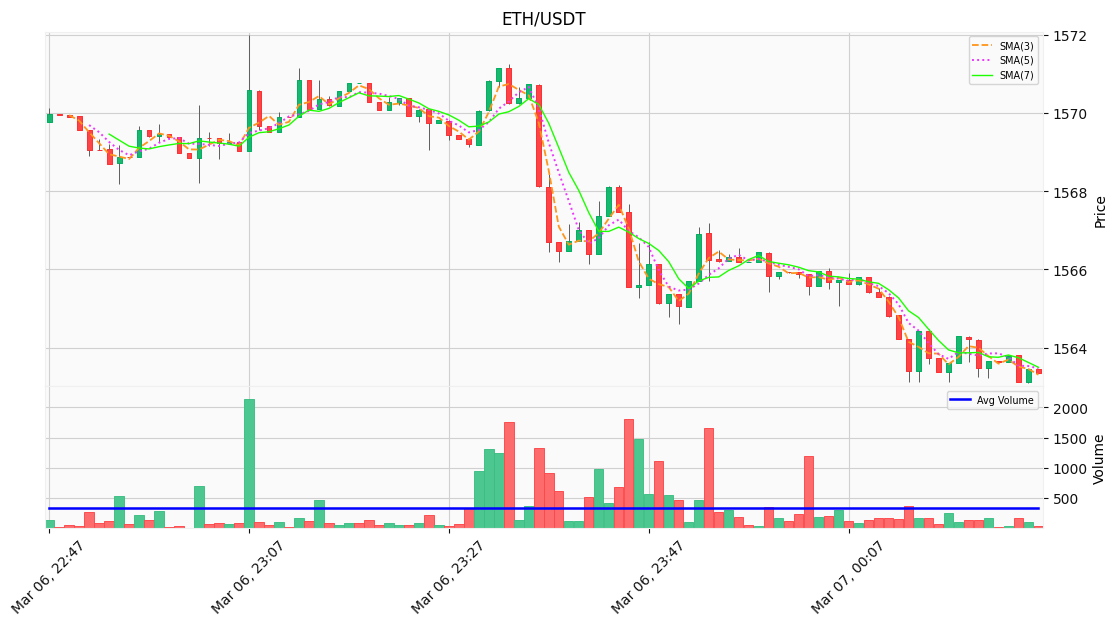

In [29]:
ap0 = [
    mpf.make_addplot(df[f"Mean({d3})"], color = '#ff951c', panel=0,linestyle='--',width=1.3),
    mpf.make_addplot(df[f"Mean({d5})"], color = '#ee35ff', panel=0,linestyle=':',width=1.4),
    mpf.make_addplot(df[f"Mean({d7})"], color = '#1dff00', panel=0,width=1),
    mpf.make_addplot([df["Volume"].mean()]* len(df),color = 'b', panel = 1)
    ]


fig, axes = mpf.plot(df,returnfig = True,type='candle',volume = True, addplot=ap0,style = style,tight_layout = True, figratio = (16,8))
axes[0].set_title(f"{coin}")
axes[0].legend([None]*(len(ap0)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(fontsize = 'x-small',loc = 'best',handles=handles[2:],labels=[f'SMA({d3})',f'SMA({d5})',f'SMA({d7})'])
axes[2].legend(fontsize = 'x-small',loc = 'best',labels = ['Avg Volume'])
plt.show()

### EMA and SMA with Candle Stick

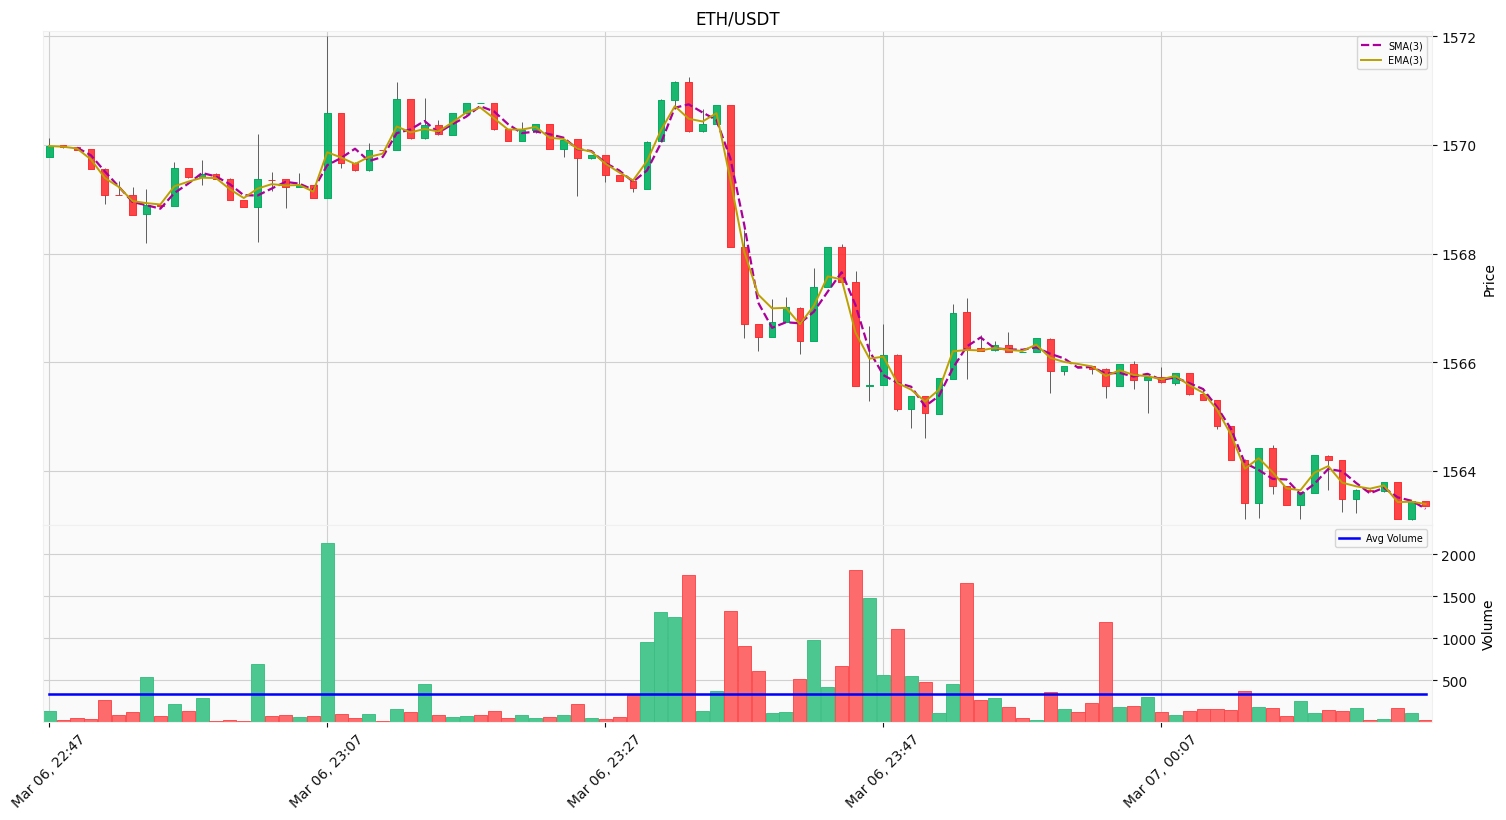

In [30]:
ap0 = [
    mpf.make_addplot(df[f"Mean({d3})"], color = '#aa0099', panel=0,linestyle='--', width = 1.6, alpha = 1),
    mpf.make_addplot(df[f"EMA({d3})"], color = '#bca000', panel=0, width = 1.4, alpha = 1),
    mpf.make_addplot([df["Volume"].mean()]* len(df),color = 'b', panel = 1)
    ]


fig, axes = mpf.plot(df,returnfig = True,type='candle',volume = True, addplot=ap0,style = style,tight_layout = True,figsize = (16,8))
axes[0].set_title(f"{coin}")
axes[0].legend([None]*(len(ap0)+2))
handles = axes[0].get_legend().legend_handles
axes[0].legend(fontsize = 'x-small',loc = 'best',handles=handles[2:],labels=[f'SMA({d3})',f'EMA({d3})'])
axes[2].legend(fontsize = 'x-small',loc = 'best',labels = ['Avg Volume'])
plt.show()

### Calculating and plotting MACD

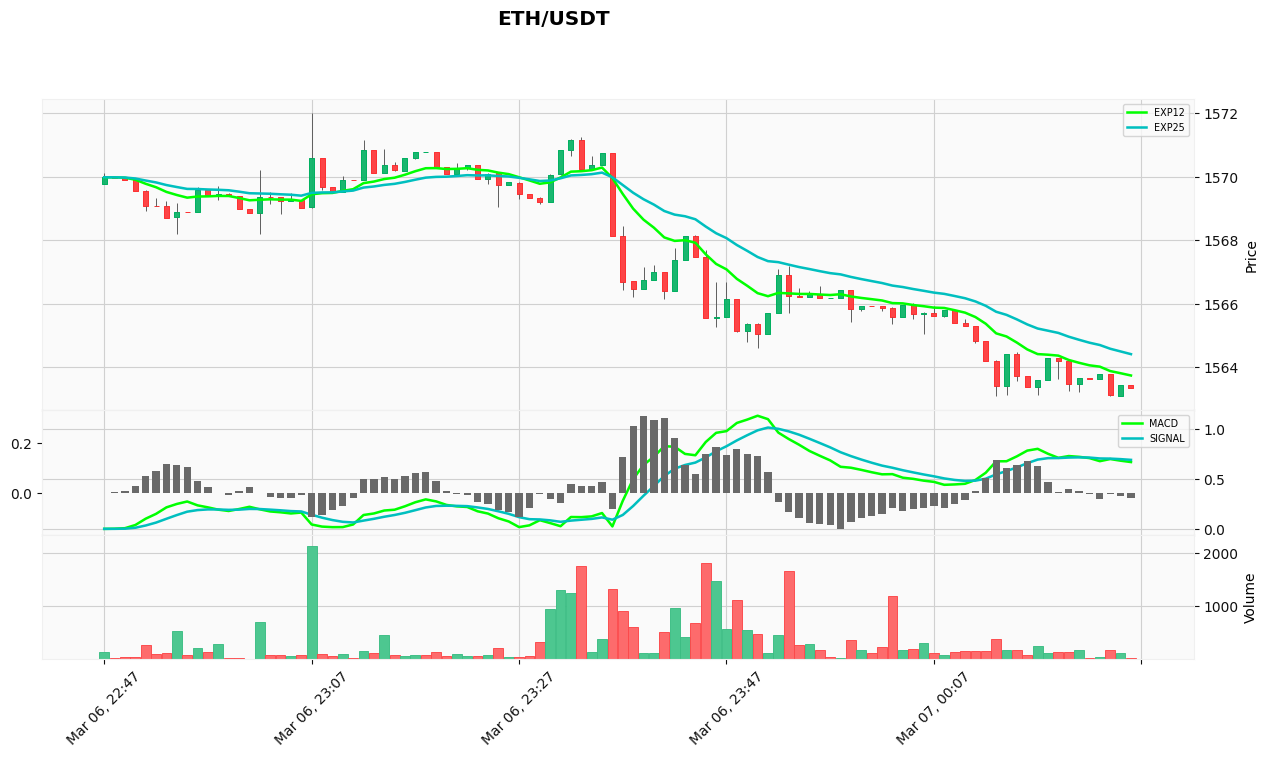

In [31]:
exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()
macd  = abs(exp12 - exp26)
signal = macd.ewm(span=7, adjust=False).mean()
histogram = macd - signal

apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,color='dimgray',alpha=1,secondary_y=True),
        mpf.make_addplot(macd,panel=1,color='lime',secondary_y=False),
        mpf.make_addplot(signal,panel=1,color='c',secondary_y=False)
       ]

fig, axes = mpf.plot(df,type='candle',addplot=apds,figsize = (16,8),figscale=1.6,figratio=(6,5),title=coin,style=style,volume=True,volume_panel=2,returnfig = True,)

axes[0].legend([None]*(4))
axes[2].legend([None]*(4))
handles = axes[0].get_legend().legend_handles
axes[0].legend(fontsize = 'x-small',loc = 'upper right',handles=handles[2:],labels=['EXP12', 'EXP25'])
axes[2].legend(fontsize = 'x-small',loc = 'upper right',handles=handles[2:],labels=['MACD', 'SIGNAL'])
plt.show()